In [20]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
df1.shape

(13320, 9)

In [23]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [24]:
df1 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis = 1)

In [25]:
#data cleaning

In [26]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [27]:
#instead of dropping na values we can take median and fill it, but since 73 is <<<133320
df1 = df1.dropna()
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [28]:
df1.shape

(13246, 5)

In [29]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [30]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(" ")[0]))
df1.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [31]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [32]:
df1 = df1.drop('size', axis='columns')
df1.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [33]:
df1[df1['BHK'] > 20]

,location,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [34]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [35]:
#to check if all the values in total_Sqft are float or not
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [36]:
df1[~df1['total_sqft'].apply(is_float)].head()
#values that are not float

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2


In [37]:
#to convert range into float of mean
def total_sqft_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None    

In [38]:
df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(lambda x : total_sqft_to_float(x))
df2.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [39]:
df2.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [40]:
#feature engineering - creating a new feature
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [41]:
len(df3['location'].unique())

1304

In [42]:
#dimensionality curse or high dimensionality problem. as too many features
 #The dimension of a dataset corresponds to the number of attributes/features that exist in a 
#dataset. A dataset with a large number of attributes, generally of the order of a hundred or 
#more, is referred to as high dimensional data. Some of the difficulties that come with high 
#dimensional data manifest during analyzing or visualizing the data to identify patterns, and 
#some manifest while training machine learning models. 

In [43]:
df3.location = df3.location.apply(lambda x: x.strip())

In [44]:
location_stats = df3.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [45]:
len(location_stats[location_stats <= 10])    

1052

In [46]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
len(location_stats_less_than_10)

1052

In [47]:
df3.location = df3.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x) 
df3.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [48]:
len(df3.location.unique())

242

In [49]:
df3.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [50]:
len(df3)

13246

In [51]:
df3[df3['total_sqft']/df3['BHK'] < 300]['location'].count()

744

In [52]:
df4 = df3[~(df3['total_sqft']/df3['BHK'] < 300)]
len(df4)

12502

In [53]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

<AxesSubplot:>

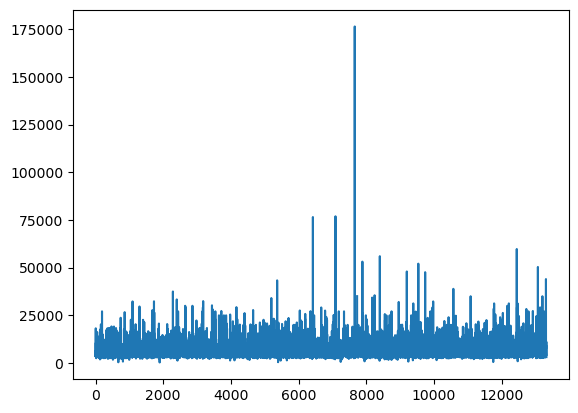

In [54]:
df4.price_per_sqft.plot()

In [55]:
df4.head(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889


In [56]:
#removing outliers for location(extreme high and low) because we're building a generic model
#filtering out data points which are 1standard deviation away
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        #each unique location act as a key. And has its own data frame.
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df5 = remove_pps_outliers(df4)
len(df5)

10241

In [57]:
#removed close to 2000 outliers from dataset

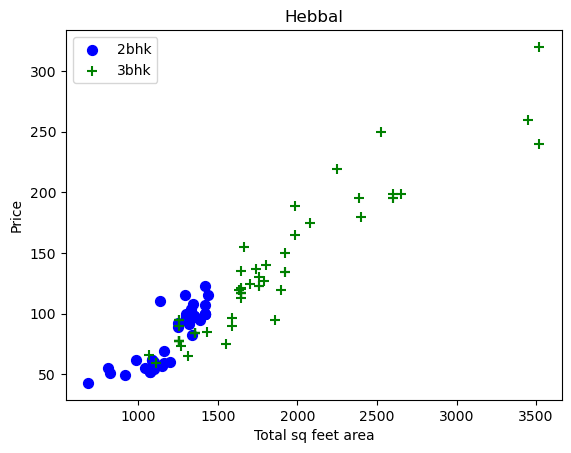

In [69]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    #matplotlib.rcParams['figure,figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label = '2bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color="green", label = '3bhk', s=50)
    plt.xlabel("Total sq feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5, "Hebbal")

In [59]:
 #For some reason the price of some datapoints 2BHK is higher than that of a 3 BHK of a same area
    #thus we should remove these outliers

In [63]:
#for understanding
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] ={ 
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
                }
        print(bhk_stats)
dfn = remove_bhk_outliers(df5)

{2: {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}, 3: {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}, 4: {'mean': 15018.711280365416, 'std': 1.2278182423353805, 'count': 3}}
{1: {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}, 2: {'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}, 3: {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}, 4: {'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}, 5: {'mean': 5666.666666666667, 'std': 0.0, 'count': 1}}
{2: {'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}, 3: {'mean': 3620.93991671624, 'std': 241.87983343248052, 'count': 5}}
{4: {'mean': 15891.203703703704, 'std': 1668.9846920398563, 'count': 4}, 6: {'mean': 16891.666666666668, 'std': 1858.333333333333, 'count': 2}}
{2: {'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}, 3: {'mean': 5511.811023622047, 'std': 0.0, 'count': 1}, 5: {'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}, 6: {'m

{1: {'mean': 4320.0, 'std': 0.0, 'count': 1}, 2: {'mean': 4129.887794312633, 'std': 508.3758300561651, 'count': 19}, 3: {'mean': 4621.353464796817, 'std': 511.44214228185155, 'count': 9}, 5: {'mean': 3333.3333333333335, 'std': 0.0, 'count': 1}}
{2: {'mean': 4195.182184632629, 'std': 472.40961899077587, 'count': 20}, 3: {'mean': 3953.2300960525395, 'std': 297.2652996762272, 'count': 3}, 6: {'mean': 5263.1578947368425, 'std': 0.0, 'count': 1}}
{1: {'mean': 4386.46711095142, 'std': 463.4471257552693, 'count': 2}, 2: {'mean': 4720.617954190519, 'std': 721.7719786205827, 'count': 40}, 3: {'mean': 4427.642898747908, 'std': 504.41094830524696, 'count': 12}, 4: {'mean': 5039.439088518843, 'std': 0.0, 'count': 1}}
{1: {'mean': 4799.375, 'std': 199.375, 'count': 2}, 2: {'mean': 4946.270140994979, 'std': 834.9741219397788, 'count': 19}, 3: {'mean': 5382.16497047624, 'std': 896.2587581277162, 'count': 15}, 4: {'mean': 3750.0, 'std': 0.0, 'count': 1}}
{2: {'mean': 7132.2680042005195, 'std': 2396.05

{1: {'mean': 5133.293879111827, 'std': 1040.4585511011248, 'count': 9}, 2: {'mean': 5376.764753392969, 'std': 940.2539293683719, 'count': 114}, 3: {'mean': 6139.2129399546575, 'std': 1182.0586574859085, 'count': 145}, 4: {'mean': 6462.746127334548, 'std': 1350.3205944520087, 'count': 24}, 5: {'mean': 5797.897681160006, 'std': 1209.3915232816719, 'count': 4}}
{1: {'mean': 3195.945945945946, 'std': 0.0, 'count': 1}, 2: {'mean': 2980.300110459942, 'std': 240.74806987622512, 'count': 6}, 3: {'mean': 3677.009046693256, 'std': 568.4897414332066, 'count': 7}}
{1: {'mean': 7556.675062972292, 'std': 0.0, 'count': 1}, 2: {'mean': 6104.475872678937, 'std': 867.7629358050074, 'count': 4}, 3: {'mean': 5840.870632537299, 'std': 558.3617721495737, 'count': 3}}
{2: {'mean': 8517.539849533492, 'std': 29.88399409911783, 'count': 4}, 3: {'mean': 8621.066433566433, 'std': 944.6855296740544, 'count': 6}, 4: {'mean': 9166.666666666666, 'std': 0.0, 'count': 1}}
{2: {'mean': 4329.211790848419, 'std': 1166.104

In [83]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = { 
            'mean': np.mean(bhk_df.price_per_sqft),
            'std': np.std(bhk_df.price_per_sqft),
            'count': bhk_df.shape[0]
                }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1) #gives us complete mean, std, count infor of element before the present one
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7329, 6)

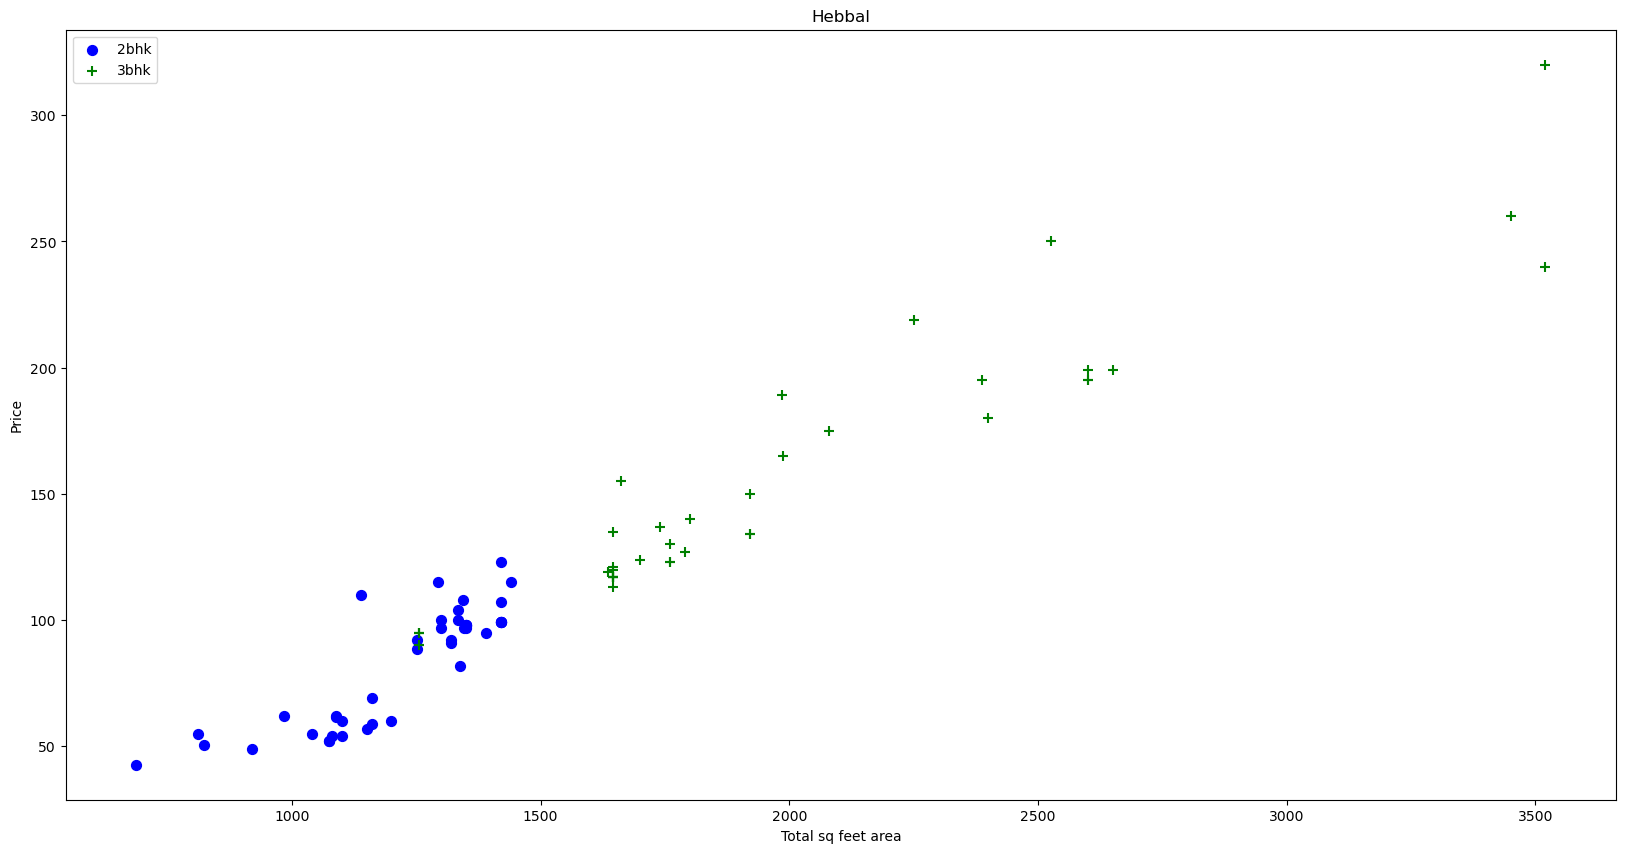

In [84]:
#Checking again
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.BHK == 2)]
    bhk3 = df[(df.location == location) & (df.BHK == 3)]
    #matplotlib.rcParams['figure,figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color="blue", label = '2bhk', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color="green", label = '3bhk', s=50)
    plt.xlabel("Total sq feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6, "Hebbal")

Text(0, 0.5, 'Count')

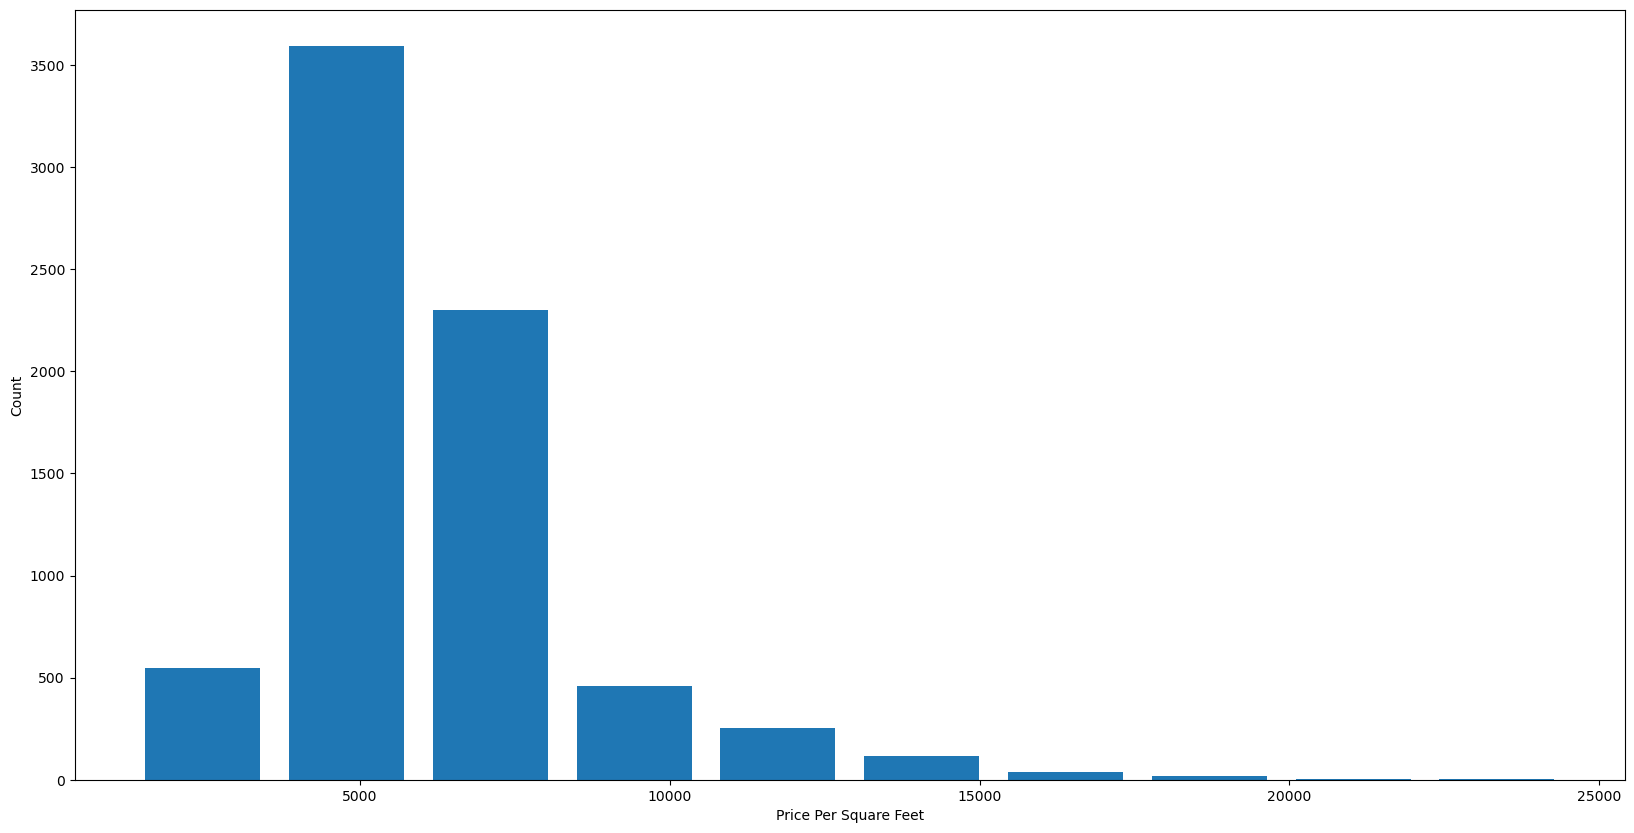

In [85]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df6.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel("Count")
#like a bell curve. Majority of data points lie between 0-10000

In [86]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [87]:
df6[df6.bath > 10]

,location,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [88]:
df7 = df6[df6.bath < df6.BHK + 2]
df7.shape

(7251, 6)

In [89]:
df7.head()

,location,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [94]:
#droppping price_per_sqft as it was used for outliers only
df7 = df7.drop(columns = 'price_per_sqft')
df7.shape

(7251, 5)